In [1]:
#Importing toolkits
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import iplot

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

In [2]:
# Adding Line To Plotly Figure
def add_line(x0 = 0, y0 = 0, x1 = 0, y1 = 0, 
             line_color = "#00DFA2", font_color = "#3C486B", 
             xposition = "right", text = "Text"):
    fig.add_shape(type='line',
                  x0 = x0,
                  y0 = y0,
                  x1 = x1,
                  y1 = y1 + 2,
                  line = {
                      "color" : line_color,
                      "width" : 3,
                      "dash" : "dashdot"
                  },
                  label={
                      "text" : f"\t{text}: {x1: 0.1f}\t".expandtabs(5),
                      "textposition": "end",
                      "yanchor" :"top",
                      "xanchor" :xposition,
                      "textangle" :0,
                      "font": {
                          "size": 14,
                          "color" :font_color,
                          "family" : "arial"

                      },
                  }
                 )

In [ ]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

In [3]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

In [6]:
#Loading dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\Salary Data (1).csv")
df



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [8]:
df.sample(10, random_state=15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
64,26.0,Male,Bachelor's,Junior Accountant,1.0,35000.0
367,41.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0
116,40.0,Female,Bachelor's,Office Manager,15.0,65000.0
176,42.0,Female,PhD,Senior Marketing Manager,18.0,140000.0
239,39.0,Male,Bachelor's,Senior Marketing Specialist,10.0,120000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
277,34.0,Female,Bachelor's,Junior Financial Analyst,5.0,70000.0
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0,100000.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [12]:
#preprocessing dataset
# Check For Duplicates
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [14]:
# Get Quick Look at Nan Values
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop Records That Contain Only Nan Values 
df.dropna(inplace=True)

# Check Again For Nan Values
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(49)

In [17]:
df[df.duplicated()].head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [18]:
# Drop Duplicates Records
df.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
df.reset_index(inplace=True, drop=True)

In [19]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [20]:
mean_of_age = df["Age"].mean()
median_of_age = df["Age"].median()

In [23]:
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
fig = px.box(
    y=df["Age"], 
    title= "Ages Distribution",
    template="plotly_dark",
    labels={"y" :"Age"},
)
custome_layout()
fig.show()

In [24]:
fig = px.histogram(
    df["Age"], 
    nbins=25,
    title= "Age Distribution",
    template="plotly_dark",
    labels={"value" :"Age"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Age: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#000', width=0.1))
)

# Adding Mean Line
add_line(x0=mean_of_age, y0=0, x1=mean_of_age, y1=30+2, line_color="#E97777",font_color="#E97777", 
         text="Mean", xposition="left")

# Adding Median Line
add_line(x0=median_of_age, y0=0, x1=median_of_age, y1=30+2, line_color="#FFE5F1",
         font_color="#fff", xposition="right", text="Median")

iplot(fig)

In [25]:
gender = df["Gender"].value_counts(normalize=1) * 100
gender.apply(lambda x: f"{x:0.2f}%")

Gender
Male      52.47%
Female    47.53%
Name: proportion, dtype: object

In [26]:
fig = px.bar(data_frame = gender,
             x = gender.index,
             y = gender,
             color = gender.index,
             title = "Gender Frequency (PCT)",
             color_discrete_sequence=["#45FFCA", "#FF9B9B"],
             labels= {"index" :"Gender", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text = gender.apply(lambda x: f"{x:0.0f}%"))

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Gender: %{x}<br>Percentage: %{y:0.1f}%",
)

iplot(fig)
        

In [27]:
education = df["Education Level"].value_counts(normalize=1) * 100
education.apply(lambda x: f"{x:0.2f}%")

Education Level
Bachelor's    58.95%
Master's      28.09%
PhD           12.96%
Name: proportion, dtype: object

In [28]:
fig = px.bar(data_frame = education,
             x = education.index,
             y = education,
             color = education.index,
             title = "Education Frequency (PCT)",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text = education.apply(lambda x: f"{x:0.0f}%"))

custome_layout()

fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Education: %{x}<br>Percentage: %{y:0.1f}%",
)

iplot(fig)

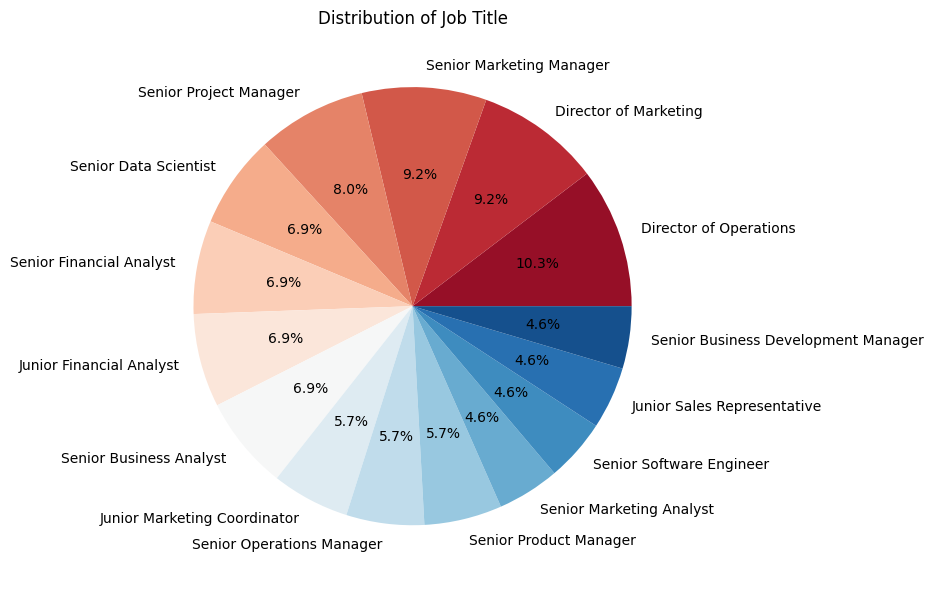

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the top 15 most common job titles and their counts
values = df['Job Title'].value_counts().nlargest(15).values.round(2)
index = df['Job Title'].value_counts().nlargest(15).index

# Set color palette
color = sns.color_palette('RdBu', n_colors=15)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.title('Distribution of Job Title')
plt.pie(values, labels=index, autopct='%1.1f%%', colors=color)
plt.tight_layout()
plt.show()

In [68]:
fig = px.box(
    y=df["Years of Experience"], 
    title= "Experience Years Distribution",
    template="plotly_dark",
    labels={"y" :"EXP Years"},
)
custome_layout()

iplot(fig)

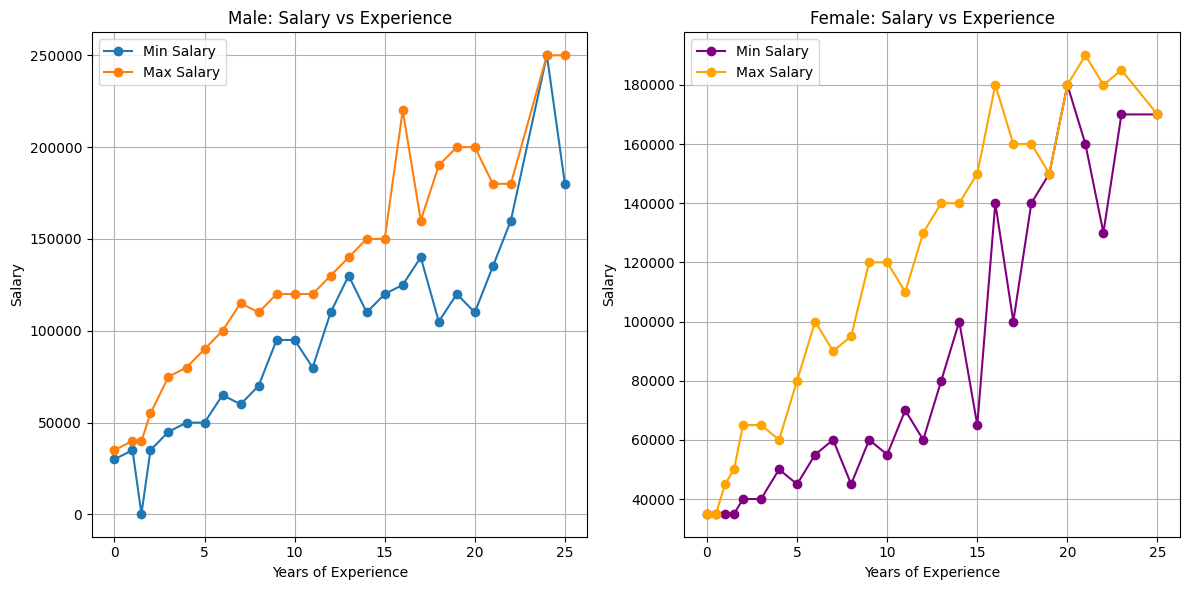

In [71]:
import matplotlib.pyplot as plt

# Grouping and aggregating
gen_work_exp = df.groupby(['Gender', 'Years of Experience'])['Salary'].agg(['min', 'max']).reset_index()

# Splitting by gender
male_exp = gen_work_exp[gen_work_exp['Gender'] == 'Male']
female_exp = gen_work_exp[gen_work_exp['Gender'] == 'Female']

# Plotting
plt.figure(figsize=(12, 6))

# Male plot
plt.subplot(1, 2, 1)
plt.plot(male_exp['Years of Experience'], male_exp['min'], label='Min Salary', marker='o')
plt.plot(male_exp['Years of Experience'], male_exp['max'], label='Max Salary', marker='o')
plt.title('Male: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

# Female plot
plt.subplot(1, 2, 2)
plt.plot(female_exp['Years of Experience'], female_exp['min'], label='Min Salary', marker='o', color='purple')
plt.plot(female_exp['Years of Experience'], female_exp['max'], label='Max Salary', marker='o', color='orange')
plt.title('Female: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [72]:
fig = px.box(
    x = df["Education Level"], y = df["Salary"],
    title= "Salary Vs. Education Level",
    template="plotly_dark",
    labels={"x": "Education Level", "y" :"Salary"}
)

custome_layout(hover_font_size=13)

iplot(fig)

In [31]:
#Average salary of males and females
salary_by_gender = df.groupby("Gender")["Salary"].mean().sort_values(ascending=False)
salary_by_gender.apply(lambda x: f"${x:,.2f}")

Gender
Male      $103,472.65
Female     $96,136.36
Name: Salary, dtype: object

In [32]:
fig = px.bar(data_frame = salary_by_gender,
             x = salary_by_gender.index,
             y = salary_by_gender,
             color = salary_by_gender.index,
             title = "AVG Salary By Gender👨👩",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s" 
            )

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Gender: %{x}<br>Average Salary: $%{y:0.4s}",
)

iplot(fig)

In [33]:
#Checking whether the education level has an influence on salary or not
salary_by_education = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
salary_by_education.apply(lambda x: f"${x:,.2f}")


Education Level
PhD           $158,095.24
Master's      $127,912.09
Bachelor's     $73,902.36
Name: Salary, dtype: object

In [34]:
fig = px.bar(data_frame = salary_by_education,
             x = salary_by_education.index,
             y = salary_by_education,
             color = salary_by_education.index,
             title = "AVG Salary Via Education Level👨👩",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s" 
            )

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Education Level: %{x}<br>Average Salary: $%{y:0.4s}",
)

iplot(fig)

In [35]:
#Checking whether years of experience influence the salary or not 
# To Convert Years of Experience into 5 Catefoty
def groupping_exp(exp):
    if exp >= 0 and exp <= 5:
        return "0-5 years"
    elif exp > 5 and exp <= 10:
        return "6-10 years"
    elif exp > 10 and exp <= 15:
        return "11-15 years"
    elif exp > 15 and exp <= 20:
        return "16-20 years"
    else:
        return "20+"   

In [36]:
salary_by_exp = df.groupby(df["Years of Experience"].apply(groupping_exp))["Salary"].mean().sort_values(ascending=False)
salary_by_exp.apply(lambda x: f"${x:,.2f}")

Years of Experience
20+            $175,400.00
16-20 years    $158,684.21
11-15 years    $115,178.57
6-10 years      $92,215.19
0-5 years       $48,881.78
Name: Salary, dtype: object

In [37]:
fig = px.bar(data_frame = salary_by_exp,
             x = salary_by_exp.index,
             y = salary_by_exp,
             color = salary_by_exp.index,
             title = "AVG Salary By Gender👨👩",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B", "#F875AA", "#3EDBF0"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s" 
            )

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Gender: %{x}<br>Average Salary: $%{y:0.4s}",
)

iplot(fig)

In [38]:
#Correlation and heatmaps 
correlation = df.corr(numeric_only=True)

fig = px.imshow(
    correlation,
    template = "plotly_dark",
    text_auto = "0.2f",
    aspect=1,
    color_continuous_scale="orrd",
    title= "Correlations Between Data"
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
            }
)
iplot(fig)


In [39]:
fig = px.scatter_matrix(
    df,
    dimensions=df.select_dtypes(include="number").columns,
    height=800,
    color="Salary",
    opacity=0.65,
    title= "Relationships Between Numerical Data",
    template="plotly_dark"
    
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

In [40]:
#Converting Categorical into numerical
df_encoded = pd.get_dummies(df, columns=["Education Level"], drop_first=True) *1
df_encoded.head()


,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Director,20.0,200000.0,1,0


In [44]:
#Selecting features
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]
X.head()

,Age,Years of Experience,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,0
1,28.0,3.0,1,0
2,45.0,15.0,0,1
3,36.0,7.0,0,0
4,52.0,20.0,1,0


In [100]:
#Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [101]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)

In [102]:
rf = RandomForestRegressor(n_estimators=500, random_state=11)

In [49]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

Cross Validation Score: 85.81%


In [104]:
#FIT THE MODEL
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 98.27%


In [106]:
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# 1. Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# 2. Load dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\Salary Data (1).csv")
df

# 3. Drop missing salary values
df = df.dropna(subset=["Salary"])

# 4. Encode categorical columns
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Education Level"] = le_edu.fit_transform(df["Education Level"])
df["Job Title"] = le_job.fit_transform(df["Job Title"])

# 5. Define features and target
X = df[["Gender", "Education Level", "Job Title", "Age", "Years of Experience"]]
y = df["Salary"]

# 6. Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

# 7. Save model and encoders
joblib.dump(model, "salary_model.pkl")
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_edu, "le_edu.pkl")
joblib.dump(le_job, "le_job.pkl")

print("Model and encoders saved successfully.")


Model and encoders saved successfully.


In [29]:
# To Calculate the Accuracy of the Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Example: Assuming df is your DataFrame and 'Salary' is the target column
X = df.drop('Salary', axis=1)
y = df['Salary']

# Convert categorical features to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Now compute MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 12303.90


In [91]:
# Trying other Algorhithms to check which gives the best accuracy

# KNeighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor() 
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
error2 = mean_absolute_percentage_error(y_test,y_pred2)
acc2 = (1-error2)*100
acc2

88.27122567861076

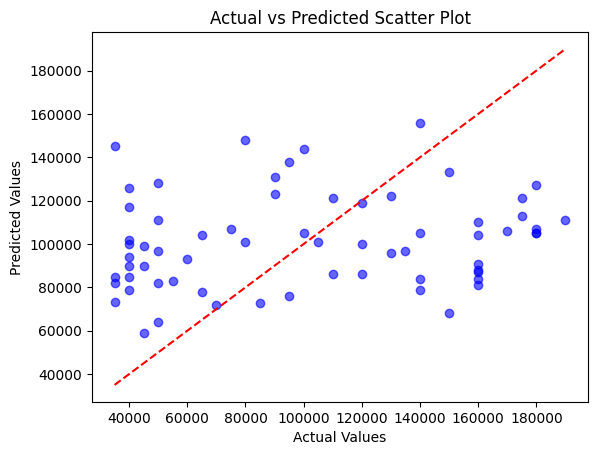

In [124]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred2, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()


In [95]:
# DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
error3 = mean_absolute_percentage_error(y_test,y_pred3)
acc3 = (1-error3)*100
acc3

88.53475029780955

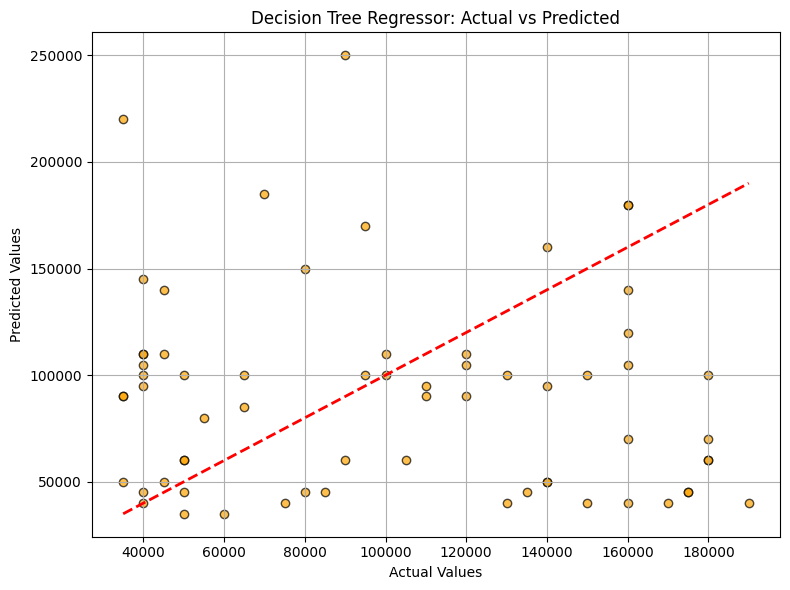

In [121]:
# DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
error3 = mean_absolute_percentage_error(y_test,y_pred3)
acc3 = (1-error3)*100
acc3
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, color='orange', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
model = LinearRegression()

R2 Score =  -66.90%
Mean Absolute Error =  52920.676077437296
Mean Squared Error =  4288658694.913993
Root Mean Squared Error =  65487.85150632133


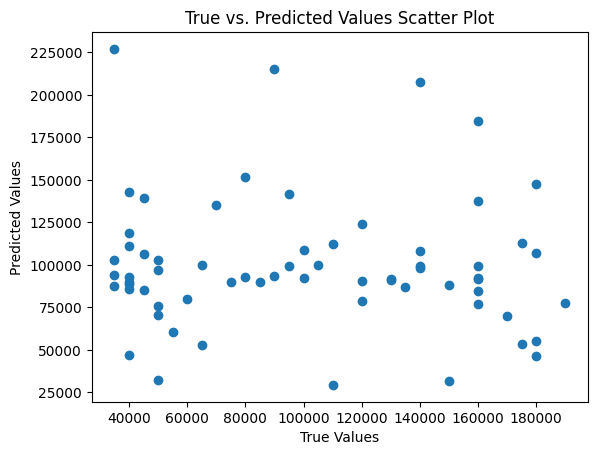

In [108]:
model.fit(x_train,y_train) 
 
# Test model
y_predict = model.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 
# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()

In [ ]:
!pip install xgboost


In [112]:
from xgboost import XGBRegressor


In [113]:
model_2 =  XGBRegressor()

R2 Score =  -43.79%
Mean Absolute Error =  51897.981790865386
Mean Squared Error =  3694833570.6734085
Root Mean Squared Error =  60785.142680373865


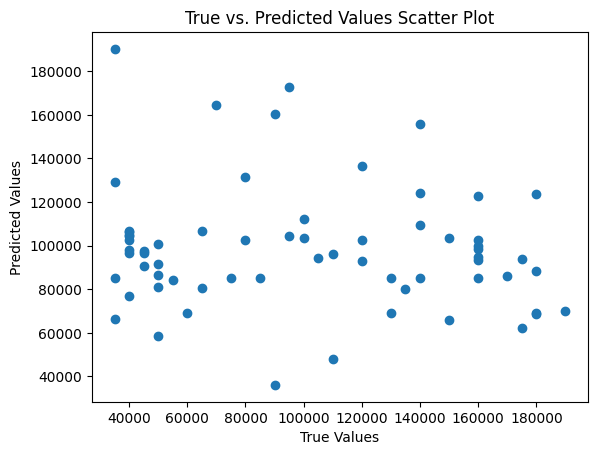

In [116]:
model_2.fit(x_train,y_train) 
 
# Test model
y_predict = model_2.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 
# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()


In [117]:
#PREDICTING THE SALARY USING RANDOMFOREST 
predicted_salary = np.round(rf.predict(X_test))

In [118]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head()

,Actual_Salary,Predicted_Salary,error
224,160000.0,155260.0,-4740.0
279,140000.0,127750.0,-12250.0
130,160000.0,178760.0,18760.0
186,100000.0,97840.0,-2160.0
149,175000.0,150850.0,-24150.0


In [54]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 93.58%


In [55]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_salary))
print(f"Error Ratio: {rmse:.3f}")

Error Ratio: 12844.269


In [56]:
fig = px.scatter(
    predected_df, 
    x = "Actual_Salary", 
    y = "Predicted_Salary",
    color = "error",
    opacity=0.8,
    title= "Predicted Vs. Actual",
    template="plotly_dark",
    trendline="ols"
    
)
fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

                     Accuracy (%)  R2 Score
Linear Regression       68.047813  0.575788
Decision Tree           75.085903  0.622076
Random Forest           81.084889  0.805123
K-Nearest Neighbors     46.551121  0.146310
XGBoost                 82.170533  0.830137


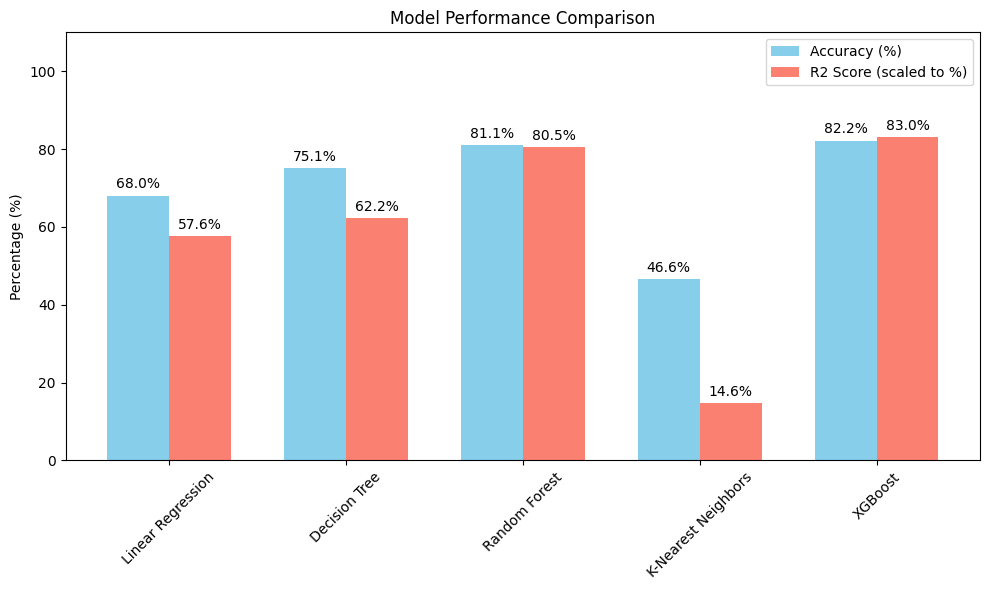

Plot should be visible now.


In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = (1 - mape) * 100
    results[name] = {"Accuracy (%)": accuracy, "R2 Score": r2}

results_df = pd.DataFrame(results).T
print(results_df)  # Debug print

labels = results_df.index
accuracy = results_df["Accuracy (%)"].values
r2_scores = results_df["R2 Score"].values * 100  # scale R2 to %

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='skyblue')
bars2 = ax.bar(x + width/2, r2_scores, width, label='R2 Score (scaled to %)', color='salmon')

ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylim(0, 110)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()
print("Plot should be visible now.")


In [ ]:
pip install streamlit


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=11)
rf.fit(X_train, y_train)


,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
import pickle

with open("salary_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Model saved as salary_model.pkl")


✅ Model saved as salary_model.pkl


In [26]:
import os
print(os.getcwd())


C:\Users\Dell
